In [ ]:
#Importando as bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal as sf

In [ ]:
#Abrindo o audio

In [3]:
s = np.memmap("sweep.pcm", dtype='h', mode='r') 

In [ ]:
#Declarando e atribuindo valores as variaveis que vão ser utilizadas

In [5]:
auxX = 0
auxY = 0

Fc = 1000
Fsl = 8000
Wc = 2*np.pi * Fc

tam = len(s)

saida = []

In [ ]:
#Calculando os valores para a e b

In [6]:
a =  Fsl / ((Fsl) + Wc)
b =  (Wc - (Fsl)) / (( Fsl) + Wc)

In [7]:
for i in range(1, tam):
    entrada = s[i] #Recebe o valor do arquivo de entrada
    
    y = a * entrada - a * auxX - b * auxY
    
    #Deslocando o vetor
    auxY = y
    auxX = entrada
    
    #Adiciona ao final da lista de saida
    saida.append(y)

In [ ]:
#Salvando o arquivo de saida

In [8]:
#Salvando o arquivo de saída
with open("transferencia.pcm", "wb") as novo:
    np.array(saida, dtype=np.int16).tofile(novo)
novo.close()

In [ ]:
#Plotando o grafico da entrada

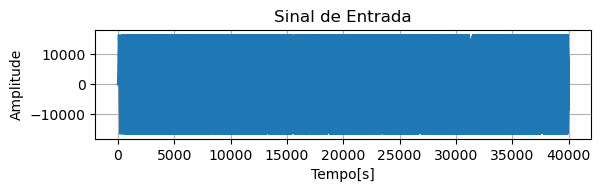

In [9]:
plt.subplot(3, 1, 1)
plt.title('Sinal de Entrada')
plt.xlabel("Tempo[s]")
plt.ylabel("Amplitude")
plt.grid(1)
plt.plot(s)

In [ ]:
#Plotando o grafico da saida

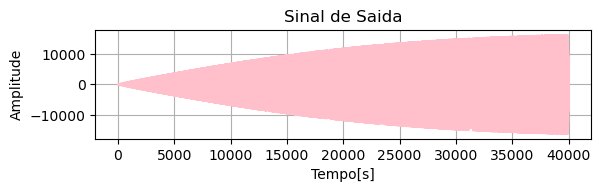

In [10]:
#Plotando a Saída
plt.subplot(3, 1, 2)
plt.title('Sinal de Saida')
plt.xlabel("Tempo[s]")
plt.ylabel("Amplitude")
plt.grid(1)
plt.plot(saida, color = 'pink') 

In [ ]:
#Sobreposição dos gráficos
#Cor azul = Som original
#Cor pink = Som após passar pelo filtro

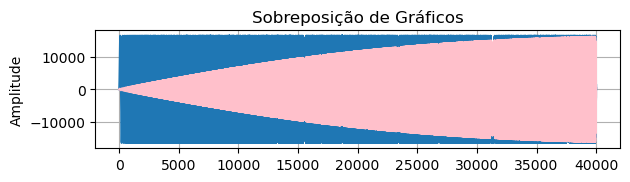

In [11]:
plt.subplot(3, 1, 3)
plt.title('Sobreposição de Gráficos')
plt.ylabel("Amplitude")
plt.grid(1)
plt.plot(s)
plt.plot(saida, color = 'pink') 
plt.tight_layout()

In [ ]:
#Calculando a resposta em frequencia

C:\Users\Jessica\AppData\Local\Temp\ipykernel_1428\3384188503.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w*Fsl/(2*np.pi), 20*np.log10(abs(H)))


Text(0.5, 1.0, 'Resposta em frequencia')

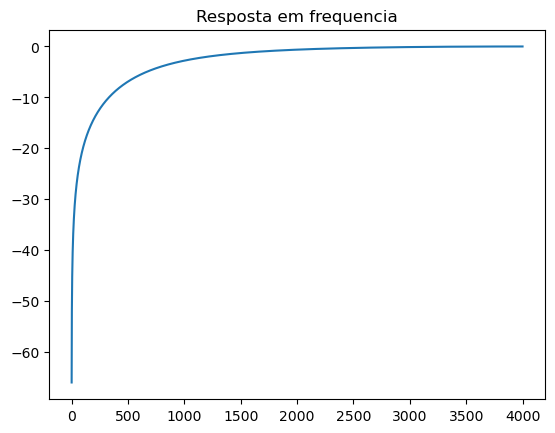

In [12]:
num = [0,16000,-16000]
den = [0,22280,-9720]

[w, H] = sf.freqz(num, den,Fsl)
plt.plot(w*Fsl/(2*np.pi), 20*np.log10(abs(H)))
plt.title('Resposta em frequencia')